# 3주차 ML Classification 실습 과제
- 과제를 완성하여 클래스룸에 기한내에 제출합니다.
- 머신러닝 프로세스(데이터 수집 -> 데이터 전처리 -> 모델 학습 -> 모델 예측 및 평가)대로 실습을 진행합니다.
- 모델을 완성한 후, '5.모델 최적화'의 매뉴얼에 따라 모델 개선을 위한 다양한 방식을 시도합니다.
- '6.모델 분석'에서 자신의 모델을 분석한 결과를 작성합니다.


## 1.데이터 수집
- 캐글의 데이터 API를 이용하여 Red Wine Quality 데이터를 로드하세요.

  (https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/My Drive/Colab Notebooks/.kaggle'

Mounted at /content/drive


In [ ]:
!kaggle datasets download -d uciml/red-wine-quality-cortez-et-al-2009

  0% 0.00/25.6k [00:00<?, ?B/s]
100% 25.6k/25.6k [00:00<00:00, 33.8MB/s]


In [ ]:
!unzip red-wine-quality-cortez-et-al-2009.zip
!ls

Archive:  red-wine-quality-cortez-et-al-2009.zip
  inflating: winequality-red.csv     
drive  red-wine-quality-cortez-et-al-2009.zip  sample_data  winequality-red.csv


- pandas의 데이터프레임 'data' 변수를 선언하여 csv 파일 형태의 데이터를  저장하세요.

In [ ]:
import pandas as pd
data = pd.read_csv('winequality-red.csv')

## 2.데이터 전처리

- data.shape(), data.info(), data.describe() 등을 통하여 데이터의 형태를 확인하고 NA(None, Null, Nan) 값이 있는 열이 있는지 확인하세요.

In [ ]:
data.shape

(1599, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

- 결측치 등 삭제/대체가 필요한 행/열이 있다면 처리하세요.

In [ ]:
#없습니당^^ 히히

- 클래스별("quality" 컬럼)로 균등한 분포를 지니는지 시각화하여 확인하세요.

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

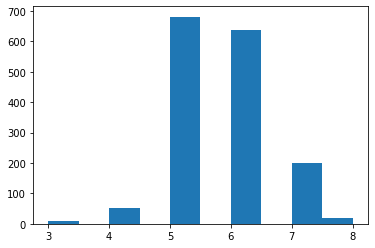

In [ ]:
import matplotlib.pyplot as plt
plt.hist(data['quality'], bins=10)

- 머신러닝 학습을 위해 피처 데이터 세트 x, 레이블 데이터 세트 y를 추출하세요.
레드 와인 품질을 분류하는 것이 목적이므로 'quality' 컬럼을 y에 대입합니다.

In [ ]:
x = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [ ]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [ ]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

- train set과 test set을 적절한 비율로 나누세요.

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state = 160,stratify = y)

## 3.모델 학습
- DecisionTreeClassifier 객체를 생성하고, 모델 학습을 수행하세요.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(x_train,y_train)
dt_prediction = dt.predict(x_test)

## 4.모델 예측 및 평가
- test set을 모델에 주입하여 예측 정확도를 확인하세요.

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, dt_prediction)

0.6041666666666666

## 5.모델 최적화

아래의 네 가지 모델 개선 방법 중 3가지 이상을 적용하여 모델을 개선합니다.
(아래 목록에서 3가지 이상 시도한 후, 데이터 증강, 기타 전처리 기법은 추가로 자유롭게 실습하셔도 됩니다. 새로운 방법 시도시 5-5와 같이 소제목을 달아주세요.)
- 데이터 전처리를 이용
- 하이퍼 파라미터 튜닝
- K-fold Cross Validation
- RandomForest

### 5-1.데이터 전처리

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x1_train, x1_test, y1_train, y1_test = train_test_split(x_scaled, y, test_size = 0.3,random_state = 160, stratify=y)

In [ ]:
dt1 = DecisionTreeClassifier()
dt1.fit(x1_train,y1_train)
dt1_prediction = dt1.predict(x1_test)
accuracy_score(y1_test, dt1_prediction)

0.59375

### 5-2.하이퍼 파라미터 튜닝

In [ ]:
dt2 = DecisionTreeClassifier(max_depth = 7)
dt2.fit(x_train , y_train)
dt2_prediction = dt2.predict(x_test)
accuracy_score(y_test, dt2_prediction)

0.5895833333333333

### 5-3.K-fold Cross Validation

In [ ]:
import numpy as np
np.random.seed(7)
from sklearn.model_selection import cross_val_score

dt3 = DecisionTreeClassifier(max_depth=7)
# 성능 지표 정확도, 교차검증 세트 5개
scores = cross_val_score(dt3,x_scaled,y,cv=5, scoring = 'accuracy')
print('교차 검증별 정확도 : ', np.round(scores, 4))
print('평균 검증 정확도 : ', np.round(np.mean(scores),4))

교차 검증별 정확도 :  [0.4688 0.5094 0.4719 0.4906 0.5705]
평균 검증 정확도 :  0.5022


### 5-4.RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=50, max_features = 5,random_state = 0)
rf.fit(x_train , y_train)
rf_prediction = rf.predict(x_test)
accuracy_score(y_test, rf_prediction)

0.6708333333333333

## 6.모델 분석
- 성능이 가장 우수한 모델은? :
- 모델의 문제점은? :
- 모델의 개선 가능성은? :

In [ ]:
#Randomforest가 성능이 가장 우수하게 나왔다.
#데이터 전처리와 하이퍼 파라미터 튜닝등의 과정을 거쳤을 때, 오히려 정확도가 감소하였는데, 이는 과적합의 문제로 보인다.
#모델의 문제라기 보다는 어떤 모델을 사용하던 과적합이 발생하는 것 같다.
#데이터 셋이 더 많아지거나 randomforest처럼 여러가지 트리를 활용하여 과적합을 해소하는 방식으로 개선할 수 있을 것 같다.